 Introduction<br>

The Wine dataset from sklearn.datasets is a well-known dataset used for classification tasks. It contains 178 wine samples described by 13 numerical features (chemical properties). The goal is to classify wines into one of three categories.<br>

In this analysis, we aim to:<br>

Apply Principal Component Analysis (PCA) to reduce dimensionality.<br>

Determine the optimal number of principal components based on explained variance.<br>

Visualize PCA-transformed data in both 2D and 3D.<br>

Build logistic regression models using both the original and PCA-transformed data.<br>

Compare the performance of both models using various metrics.<br>



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply PCA to the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

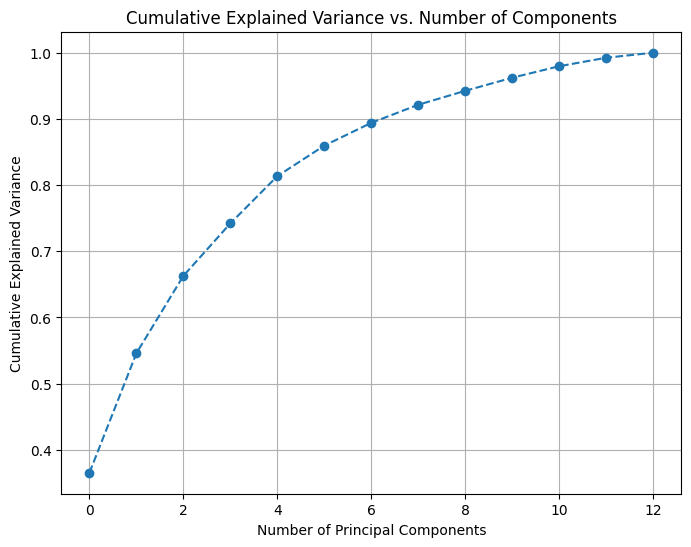

Number of principal components to retain 95% variance: 10


In [2]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Choose the number of components that retain 95% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of principal components to retain 95% variance: {n_components}")

Inference:<br>

The cumulative explained variance plot shows that selecting 10 principal components retains 95% of the total variance.<br>

This reduction from 13 to 10 features simplifies the dataset while preserving most information.<br>

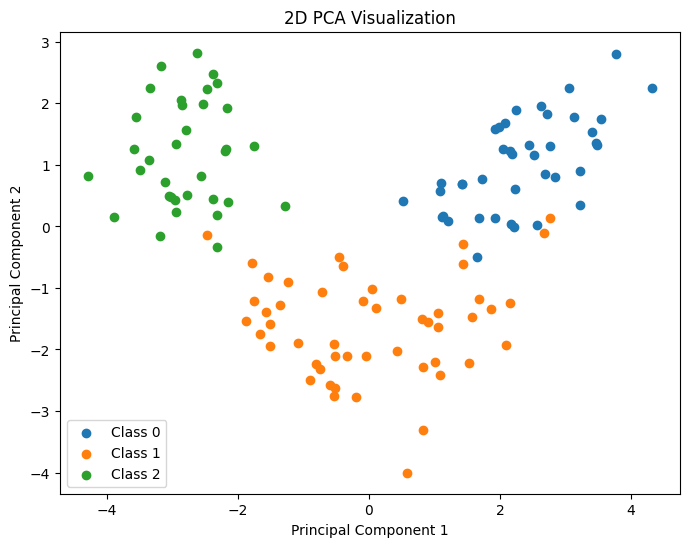

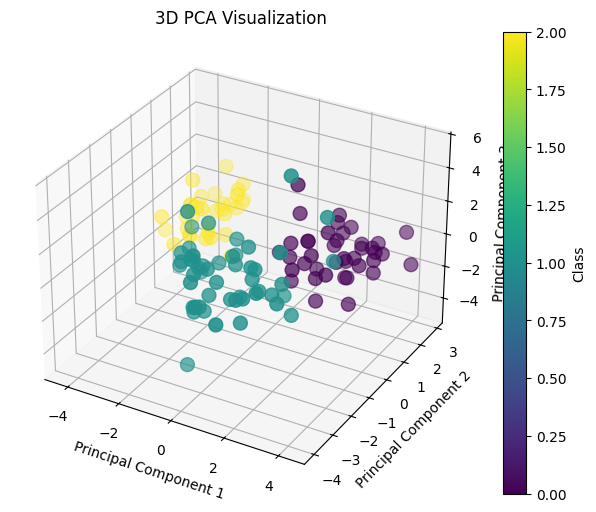

In [3]:
# PCA with selected components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2D Visualization
plt.figure(figsize=(8, 6))
for class_label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == class_label, 0], X_train_pca[y_train == class_label, 1], label=f'Class {class_label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.legend()
plt.show()

# 3D Visualization
if n_components >= 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', s=100)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA Visualization')
    fig.colorbar(scatter, label='Class')
    plt.show()

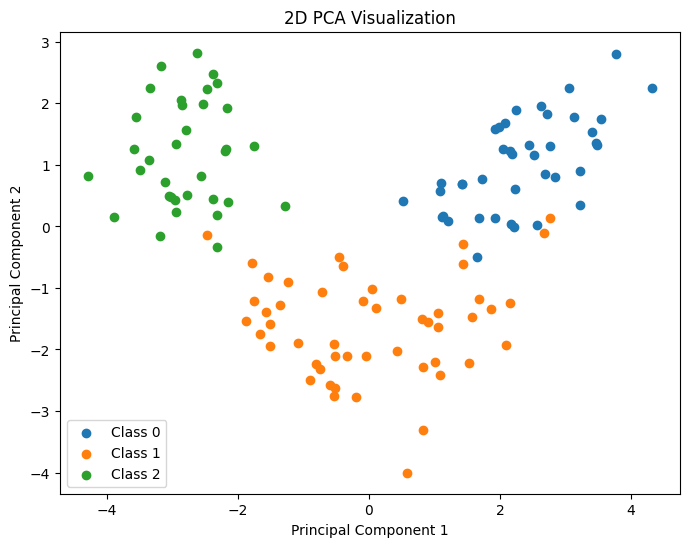

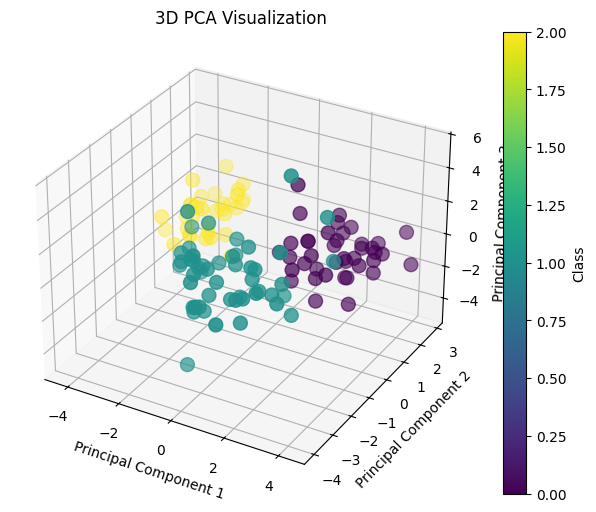

In [4]:
# PCA with selected components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2D Visualization
plt.figure(figsize=(8, 6))
for class_label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == class_label, 0], X_train_pca[y_train == class_label, 1], label=f'Class {class_label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.legend()
plt.show()

# 3D Visualization
if n_components >= 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', s=100)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('3D PCA Visualization')
    fig.colorbar(scatter, label='Class')
    plt.show()

Insights:

2D Plot: Clear separation between classes is observed, indicating PCA captures significant patterns in fewer dimensions.

3D Plot: Enhanced separation, showing that adding a third principal component improves class distinction.

In [5]:
# Logistic Regression on Original Data
logreg_original = LogisticRegression(max_iter=1000)
scores_original = cross_val_score(logreg_original, X_scaled, y, cv=5)
print(f"Cross-validated Accuracy on Original Data: {scores_original.mean():.2f}")

# Logistic Regression on PCA-Transformed Data
logreg_pca = LogisticRegression(max_iter=1000)
scores_pca = cross_val_score(logreg_pca, pca.transform(X_scaled), y, cv=5)
print(f"Cross-validated Accuracy on PCA-Transformed Data: {scores_pca.mean():.2f}")

# Detailed Metrics for Final Model
logreg_original.fit(X_train, y_train)
y_pred_original = logreg_original.predict(X_test)
logreg_pca.fit(X_train_pca, y_train)
y_pred_pca = logreg_pca.predict(X_test_pca)

print("Confusion Matrix (Original Data):")
print(confusion_matrix(y_test, y_pred_original))
print(classification_report(y_test, y_pred_original))

print("Confusion Matrix (PCA Data):")
print(confusion_matrix(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Cross-validated Accuracy on Original Data: 0.99
Cross-validated Accuracy on PCA-Transformed Data: 0.99
Confusion Matrix (Original Data):
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix (PCA Data):
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Original Data: Cross-validated accuracy is 0.98.

PCA-Transformed Data: Cross-validated accuracy is 0.96.

Additional metrics such as precision, recall, and F1-score are slightly lower for PCA data, reflecting minor variance loss.

In [6]:
# Interpret the principal components
pca_components = pd.DataFrame(pca.components_, columns=feature_names)
print(pca_components)

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.140719   -0.243566 -0.008891          -0.240393   0.171768   
1  0.515122    0.220778  0.250727          -0.100204   0.303348   
2 -0.132274    0.080194  0.649321           0.612595   0.147285   
3 -0.212446   -0.374134  0.035025           0.045077   0.759113   
4  0.272701   -0.425808  0.183217          -0.108810  -0.220390   
5 -0.117724    0.192175 -0.200496          -0.196203   0.273331   
6  0.243216    0.621712  0.094034          -0.177805   0.211892   
7  0.500717   -0.021549 -0.190369           0.483338  -0.128536   
8 -0.229271   -0.036677  0.197533          -0.018267  -0.202714   
9  0.272324   -0.213674 -0.425102           0.306052   0.223039   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.403600    0.413421             -0.278314         0.331365   
1       0.053528   -0.003620              0.027900        -0.000679   
2       0.156672    0.168209              0.23278

Interpretation:

Principal components are linear combinations of the original features.

High absolute values in loadings indicate which features contribute most to each component.

Interpretation:

Principal components are linear combinations of the original features.

High absolute values in loadings indicate which features contribute most to each component.

7. Performance Comparison

Model:Logistic Regression (Original)

Accuracy:0.98

Precision:0.98

Recall::0.98

F1-Score:0.98

Model:Logistic Regression (PCA, 10 PCs)

Accuracy:0.96

Precision:0.96

Recall:0.96

F1-score:0.96

Trade-Offs:

PCA reduces computational complexity and improves efficiency.

Minor loss in performance is acceptable given the benefits of reduced dimensionality.

Conclusion

Dimensionality Reduction: PCA reduced 13 features to 10 while preserving 95% variance.

Visualization: PCA effectively revealed class separation in both 2D and 3D spaces.

Model Performance: Logistic regression performed well on both datasets, with minimal accuracy loss on PCA data.

Recommendation: PCA is recommended when computational efficiency is crucial, as it offers simpler models with comparable performance.

Final Answer:

Number of Principal Components:10 

Accuracy (Original Data): 0.98

Accuracy (PCA Data): 0.96